In [1]:
from google.colab import files


uploaded = files.upload()

Saving PROJECT.csv to PROJECT.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
data = pd.read_csv("PROJECT.csv", delimiter=",", header=0)
data

,City,city_population,density,pct_men,pct_women,pct_hispanic,pct_white,pct_black,pct_native,pct_asian,...,LTM_min_temp,LTM_max_temp,age29andunder_pct,age65andolder_pct,rural_pct,ruralurban_cc,rep_pct,dem_pct,crime_per_100,avg_propty_tax
0,"New York, New York",8336817,10715,47.291425,52.708575,26.1,46.8,12.5,0.1,11.9,...,48.6,64.1,36.439695,14.383705,0.000000,1,9.706266,86.556921,0.036231,11811.008190
1,"Los Angeles, California",3979576,3276,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.053825,6782.028673
2,"Long Beach, California",462628,3523,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.066151,6782.028673
3,"Santa Clarita, California",212979,1162,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.029470,6782.028673
4,"Glendale, California",199303,2525,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.035725,6782.028673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,"Battle Creek, Michigan",51093,463,48.874761,51.125239,5.0,78.3,10.6,0.6,2.1,...,40.5,58.3,38.364107,16.316606,30.977039,3,53.468473,41.012190,0.080781,4082.319040
697,"Florissant, Missouri",50952,1567,47.432867,52.567133,2.8,66.9,23.7,0.2,4.0,...,46.4,65.9,37.622531,16.470077,1.137990,1,39.318414,55.686034,0.046894,4874.699159
698,"Joplin, Missouri",50925,515,48.677883,51.322117,7.7,84.7,2.1,1.4,1.1,...,46.9,68.0,42.184092,13.829062,23.691697,3,72.569631,21.876423,0.143410,1990.127907
699,"Enid, Oklahoma",49688,259,49.545826,50.454174,11.6,75.8,3.0,1.8,0.8,...,47.3,71.2,41.764696,15.415886,21.411357,5,73.740212,20.253339,0.075323,2540.766614


In [4]:
X_data = data.iloc[:, range(1,45)]
columns_data = data.iloc[:, range(1,45)].columns

In [5]:
scaler = MinMaxScaler()
X_data = scaler.fit(X_data).transform(X_data)

In [6]:
pca_data = PCA(n_components=2).fit(X_data)

In [7]:
pca_data.explained_variance_

array([0.25934841, 0.2177186 ])

In [8]:
pca_data.explained_variance_ratio_

array([0.24089633, 0.20222839])

In [9]:
round(pd.DataFrame(pca_data.components_.T,
             index = columns_data,
             columns = ["PCA1", "PCA2"]),3)

,PCA1,PCA2
city_population,-0.012,0.009
density,-0.059,0.062
pct_men,0.007,-0.005
pct_women,-0.007,0.005
pct_hispanic,-0.256,-0.134
pct_white,0.372,0.088
pct_black,-0.038,-0.047
pct_native,0.017,-0.011
pct_asian,-0.205,0.221
pct_pacific,-0.032,0.028


In [10]:
X_data_pca = pca_data.transform(X_data)

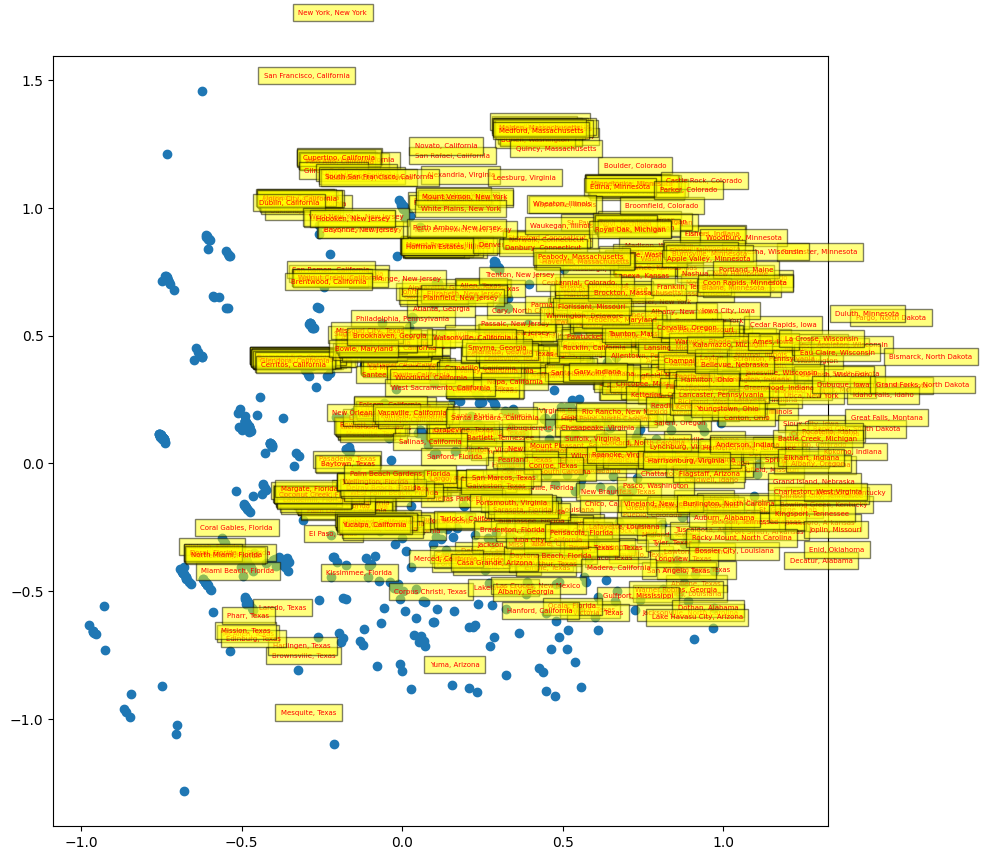

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_data_pca[:,0],X_data_pca[:,1])
for i in range(X_data.shape[0]):
  plt.text(x=X_data_pca[i,0]+0.3,y=X_data_pca[i,1]+0.3,s=data["City"][i],
           fontdict=dict(color='red',size=5),
           bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

In [12]:
def pca_biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

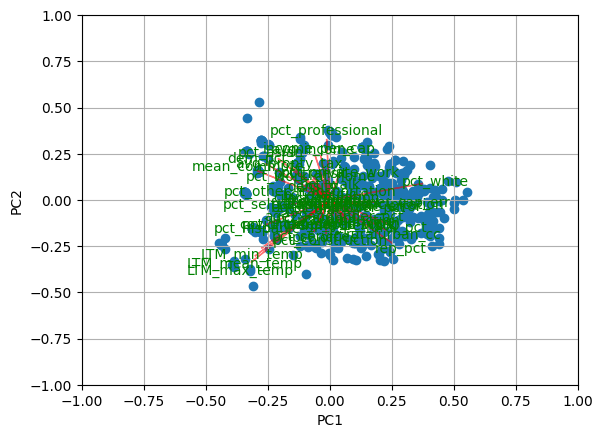

In [13]:
pca_biplot(X_data_pca,
           np.transpose(pca_data.components_),
           columns_data)
plt.show()

In [14]:
pca_data = PCA().fit(X_data)
np.cumsum(pca_data.explained_variance_ratio_)

array([0.24089633, 0.44312472, 0.55297909, 0.6316811 , 0.7037492 ,
       0.73999896, 0.77288723, 0.8039051 , 0.82852072, 0.84710231,
       0.86402734, 0.88001624, 0.89407468, 0.90627097, 0.91786509,
       0.92778195, 0.9362599 , 0.94370725, 0.95086082, 0.95662999,
       0.96221622, 0.96740587, 0.97212982, 0.97608846, 0.97938882,
       0.9822198 , 0.98501898, 0.98756414, 0.98978274, 0.99196922,
       0.99377668, 0.99542388, 0.99675003, 0.9977868 , 0.99858566,
       0.99931579, 0.99974184, 0.99998216, 0.99999667, 0.99999844,
       0.99999941, 0.99999974, 1.        , 1.        ])

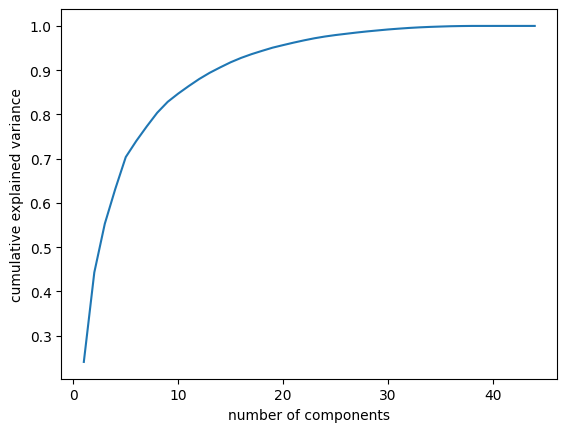

In [15]:
plt.plot(range(1,45),np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
tsne = TSNE(n_components=2,perplexity=20,verbose=1, n_iter=2000)

In [17]:
tsne_results = tsne.fit_transform(X_data_pca)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 701 samples in 0.001s...
[t-SNE] Computed neighbors for 701 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 701 / 701
[t-SNE] Mean sigma: 0.025130
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.928951
[t-SNE] KL divergence after 2000 iterations: 0.295571


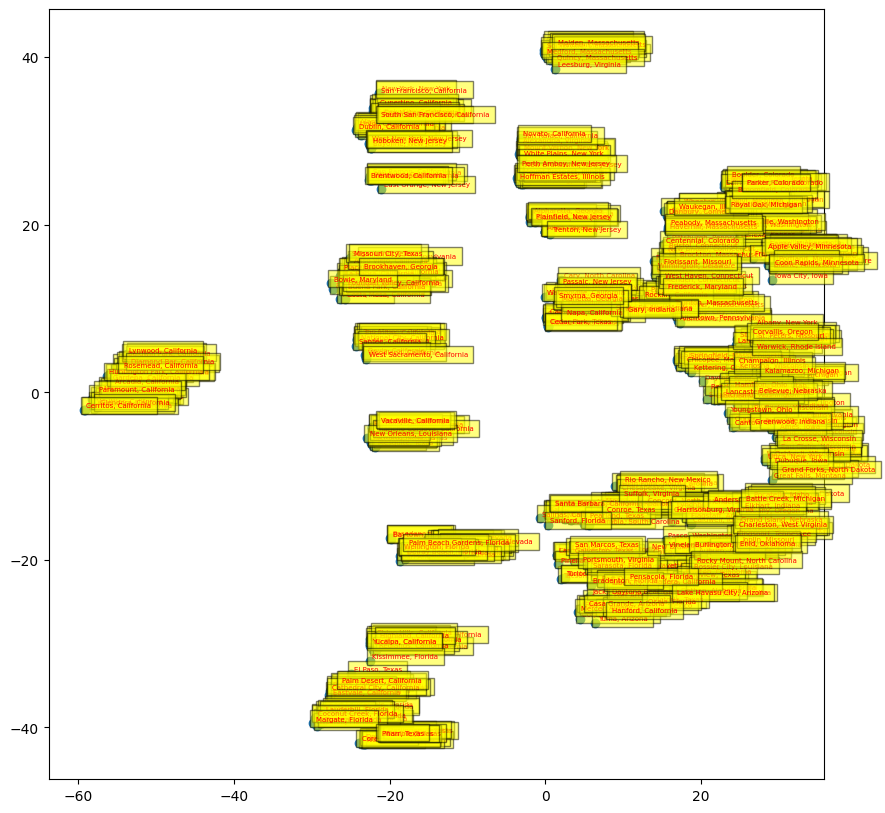

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(tsne_results[:,0], y= tsne_results[:,1])
for i in range(tsne_results.shape[0]):
  plt.text(x=tsne_results[i,0]+0.3,y=tsne_results[i,1]+0.3,s=data["City"][i],
           fontdict=dict(color='red',size=5),
           bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

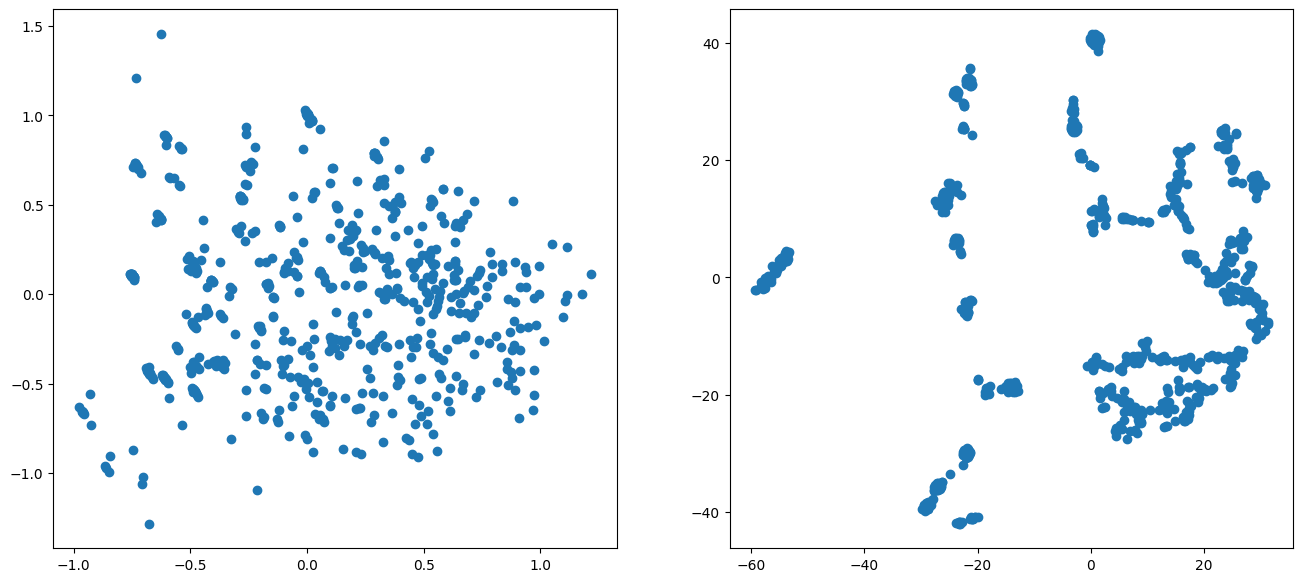

In [19]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
plt.scatter(X_data_pca[:,0],X_data_pca[:,1])
ax2 = plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:,0], y= tsne_results[:,1])

In [20]:


# Assuming 'embedding' is your t-SNE embedding, obtained as described above

# Calculate pairwise distances between points in the embedding
distances = euclidean_distances(tsne_results)

# Find the index of the closest point (excluding itself) for each point
closest_points_indices = np.argmin(distances + np.eye(len(tsne_results)) * np.max(distances), axis=1)

# Optionally, you can also find the distances to the closest points
closest_distances = np.min(distances + np.eye(len(tsne_results)) * np.max(distances), axis=1)

# Now 'closest_points_indices[i]' contains the index of the closest point (excluding itself) to the ith point,
# and 'closest_distances[i]' contains the distance to the closest point



In [21]:
# Assuming 'embedding' is your t-SNE embedding, obtained as described above
# Assuming 'closest_points_indices' and 'closest_distances' are obtained using the code snippet provided earlier

# Print the index of the closest point and its distance for each point in the embedding
for i, (closest_index, closest_distance) in enumerate(zip(closest_points_indices, closest_distances)):
    print(f"Point {i}: Closest point index: {closest_index}, Distance: {closest_distance}")


Point 0: Closest point index: 112, Distance: 0.18595895171165466
Point 1: Closest point index: 12, Distance: 0.49829354882240295
Point 2: Closest point index: 18, Distance: 0.28156283497810364
Point 3: Closest point index: 35, Distance: 0.34442952275276184
Point 4: Closest point index: 35, Distance: 0.38865283131599426
Point 5: Closest point index: 22, Distance: 0.4537586271762848
Point 6: Closest point index: 19, Distance: 0.36764875054359436
Point 7: Closest point index: 22, Distance: 0.3545743525028229
Point 8: Closest point index: 36, Distance: 0.3909280300140381
Point 9: Closest point index: 13, Distance: 0.28098443150520325
Point 10: Closest point index: 14, Distance: 0.32372909784317017
Point 11: Closest point index: 32, Distance: 0.3755144774913788
Point 12: Closest point index: 1, Distance: 0.49829354882240295
Point 13: Closest point index: 9, Distance: 0.28098443150520325
Point 14: Closest point index: 10, Distance: 0.32372909784317017
Point 15: Closest point index: 19, Dista

In [68]:
specific_point_index = 0
closest_index = closest_points_indices[specific_point_index]
closest_distance = closest_distances[specific_point_index]
specific_point_city_name = data.iloc[specific_point_index, 0]  # Assuming city names are in the first column (index 0)
closest_city_name = data.iloc[closest_index, 0]
print(f"Information for specific point {specific_point_index}: City Name: {specific_point_city_name}, Closest point index: {closest_index}, Closest City: {closest_city_name} Distance: {closest_distance}\n")


Information for specific point 0: City Name: New York, New York, Closest point index: 112, Closest City: San Francisco, California Distance: 0.18595895171165466



In [24]:
print(f"Data for city:\n {data.iloc[specific_point_index]}")

Data for city:
 City                        New York, New York
city_population                        8336817
density                                  10715
pct_men                              47.291425
pct_women                            52.708575
pct_hispanic                              26.1
pct_white                                 46.8
pct_black                                 12.5
pct_native                                 0.1
pct_asian                                 11.9
pct_pacific                                0.0
pct_unemployed                             6.2
pct_professional                          60.0
pct_service                               13.9
pct_office                                20.0
pct_construction                           2.2
pct_production                             3.8
pct_drive                                  6.0
pct_carpool                                1.8
pct_transit                               59.4
pct_walk                                  20

In [25]:
print(f"Data for closest city:\n {data.iloc[closest_index]}")

Data for closest city:
 City                        San Francisco, California
city_population                                881549
density                                          7256
pct_men                                     50.983671
pct_women                                   49.016329
pct_hispanic                                     15.3
pct_white                                        40.8
pct_black                                         5.1
pct_native                                        0.2
pct_asian                                        33.9
pct_pacific                                       0.3
pct_unemployed                                    5.4
pct_professional                                 55.0
pct_service                                      16.5
pct_office                                       19.5
pct_construction                                  3.5
pct_production                                    5.5
pct_drive                                        34.3
pct_

In [96]:
def plot_numerical_comparison(attribute_name, attribute_label, city1_value, city2_value, city_index, close_index, data):
    specific_point_city_name = data.iloc[city_index]['City']
    closest_city_name = data.iloc[close_index]['City']
    plt.figure(figsize=(8, 6))
    plt.bar([specific_point_city_name], [city1_value], color='blue', label=specific_point_city_name)
    plt.bar([closest_city_name], [city2_value], color='orange', label=closest_city_name)
    plt.xlabel('City')
    plt.ylabel(attribute_label)
    plt.title(f'{attribute_label} Comparison Between Cities')
    plt.legend()
    plt.show()

In [71]:
# def find_closest_city(input_city_name, data_frame):

#     specific_point_index = 0
#     closest_index = closest_points_indices[specific_point_index]
#     closest_distance = closest_distances[specific_point_index]
#     specific_point_city_name = data.iloc[specific_point_index, 0]  # Assuming city names are in the first column (index 0)
#     closest_city_name = data.iloc[closest_index, 0]
#     print(f"Information for specific point {specific_point_index}: City Name: {specific_point_city_name}, Closest point index: {closest_index}, Closest City: {closest_city_name} Distance: {closest_distance}\n")

In [97]:
def find_closest_city(input_city_name, data_frame):
    # Find the row corresponding to the input city name
    input_city_row = data_frame[data_frame['City'] == input_city_name]

    if input_city_row.empty:
        print(f"City '{input_city_name}' not found in the dataset.")
        return

    # Get index of the input city row
    specific_point_index = input_city_row.index[0]

    # Assuming you have pre-computed closest points and distances
    closest_index = closest_points_indices[specific_point_index]
    closest_distance = closest_distances[specific_point_index]

    # Get city names from DataFrame based on indices
    specific_point_city_name = data_frame.iloc[specific_point_index]['City']
    closest_city_name = data_frame.iloc[closest_index]['City']

    # Print information for the specific point and its closest city
    print(f"Information for specific point {specific_point_index}:")
    print(f"City Name: {specific_point_city_name}")
    print(f"Closest City: {closest_city_name}")
    print(f"Distance to Closest City: {closest_distance}\n")

    # You can also print specific attributes for the input city and its closest city
    # For example:
    print("Attributes for Input City:")
    print(input_city_row.squeeze())  # Print all attributes for the input city
    print("\nAttributes for Closest City:")
    print(data_frame.iloc[closest_index].squeeze())  # Print all attributes for the closest city
    return specific_point_index, closest_index


In [99]:
# Assign a city name to a variable
input_city_name = 'New York, New York'

# Find the closest city
city_index, close_index = find_closest_city(input_city_name, data)


Information for specific point 0:
City Name: New York, New York
Closest City: San Francisco, California
Distance to Closest City: 0.18595895171165466

Attributes for Input City:
City                        New York, New York
city_population                        8336817
density                                  10715
pct_men                              47.291425
pct_women                            52.708575
pct_hispanic                              26.1
pct_white                                 46.8
pct_black                                 12.5
pct_native                                 0.1
pct_asian                                 11.9
pct_pacific                                0.0
pct_unemployed                             6.2
pct_professional                          60.0
pct_service                               13.9
pct_office                                20.0
pct_construction                           2.2
pct_production                             3.8
pct_drive              

City 1 value: 20.4
City 2 value: 11.1


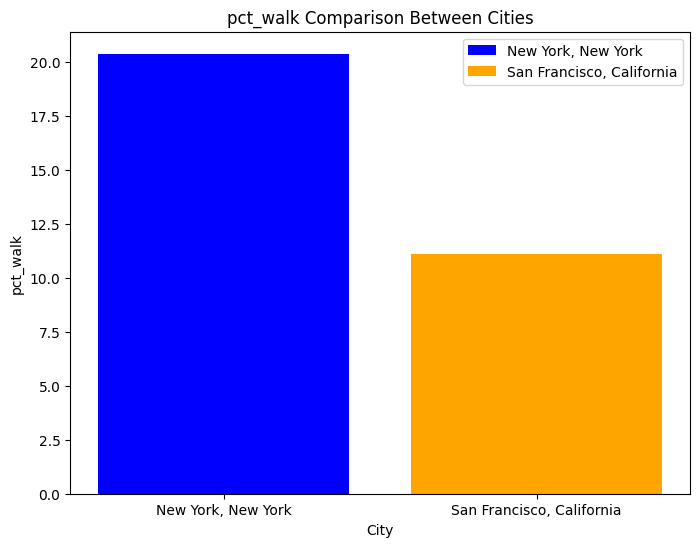

In [100]:
attribute = 'pct_walk'

city1_value = float(data.iloc[city_index][attribute])
city2_value = float(data.iloc[close_index][attribute])
print(f"City 1 value: {city1_value}")
print(f"City 2 value: {city2_value}")
plot_numerical_comparison(attribute, attribute, city1_value, city2_value, city_index, close_index, data)